In [1]:
import warnings
warnings.filterwarnings('ignore')

# Prepare the Dataset

In [2]:
dataset_name = 'MNIST'

In [3]:
import numpy as np
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X, X_test))
y = np.concatenate((y, y_test))
imgs = X
del X_test
del y_test

print('Dataset size {}'.format(X.shape))


Using TensorFlow backend.


Dataset size (70000, 28, 28)


# VAE

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
!git rev-parse HEAD > hash.txt

In [6]:
model_name = 'VAE'
with open ("hash.txt", "r") as myfile:
    data=myfile.readlines()
 # will be used to identify which version of the code the experiment was run on.

In [7]:
revision_hash=data[0].rstrip()


In [8]:
from models.VAE import VAE

In [9]:
ae = VAE(dataset_name, epochs=int(2e5), num_layers=3, latent_dim=10,
        hidden_dim=500, l_rate=1e-4, batch_size=64, plot=True,restore=True, clustering=False,revision_hash=revision_hash)

In [12]:
ae.build(X,y)


 Processing data...
Scaling dataset


Mixture of types in 'arrays'. Falling back to scikit-learn.


Training dataset shape:  (56000, 28, 28, 3)
Validation dataset shape:  (14000, 28, 28, 3)
Sample dataset shape:  (50000, 28, 28, 3)

 building a model...

[*] Defining encoder...

[*] Layer ( encoder_mean/dense_1/Relu:0 ) output shape: [64, 500]
[*] Layer ( encoder_mean/dense_1_dropout/Identity:0 ) output shape: [64, 500]
[*] Layer ( encoder_mean/dense_2/Relu:0 ) output shape: [64, 500]
[*] Layer ( encoder_mean/dense_2_dropout/Identity:0 ) output shape: [64, 500]
[*] Layer ( encoder_mean/H2_batch_norm/batchnorm/add_1:0 ) output shape: [64, 500]
[*] Layer ( encoder_mean/dense_3/BiasAdd:0 ) output shape: [64, 10]

[*] Layer ( encoder_var/dense_1/Relu:0 ) output shape: [64, 500]
[*] Layer ( encoder_var/dense_1_dropout/Identity:0 ) output shape: [64, 500]
[*] Layer ( encoder_var/dense_2/Relu:0 ) output shape: [64, 500]
[*] Layer ( encoder_var/dense_2_dropout/Identity:0 ) output shape: [64, 500]
[*] Layer ( encoder_var/H2_batch_norm/batchnorm/add_1:0 ) output shape: [64, 500]
[*] Layer ( en

Scaling dataset
Sample dataset shape:  (5000, 28, 28, 3)
Loading model checkpoint experiments/VAE_MNIST_latent_dim10_h_dim500_h_nl3_sigma0001_c11046a2cf04f4c2c60811d736f94aeed422f0d4/checkpoints\-12250 ...

INFO:tensorflow:Restoring parameters from experiments/VAE_MNIST_latent_dim10_h_dim500_h_nl3_sigma0001_c11046a2cf04f4c2c60811d736f94aeed422f0d4/checkpoints\-12250
Model loaded
EPOCHS trained:  5



VALID | VAE Loss:  307.55817 AE Loss:  268.26846  | Recons:  268.2647
      | KL-div:  39.289684  | L2_loss:  3775.4985
Generating W space ...
Loading model checkpoint experiments/VAE_MNIST_latent_dim10_h_dim500_h_nl3_sigma0001_c11046a2cf04f4c2c60811d736f94aeed422f0d4/checkpoints\-12250 ...

INFO:tensorflow:Restoring parameters from experiments/VAE_MNIST_latent_dim10_h_dim500_h_nl3_sigma0001_c11046a2cf04f4c2c60811d736f94aeed422f0d4/checkpoints\-12250
Model loaded
EPOCHS trained:  5



W space dimensions: (70000, 2)
Ploting W space ...
experiments/VAE_MNIST_latent_dim10_h_dim500_h_nl3_sigma0001_c11046a2cf04f4c2c60811d736f94aeed422f0d4/log/log W space in epoch 0.jpg
Plotting Dataset
data size (70000, 2)



Saving Image experiments/VAE_MNIST_latent_dim10_h_dim500_h_nl3_sigma0001_c11046a2cf04f4c2c60811d736f94aeed422f0d4/log/log W space in epoch 0.jpg ...
W space dimensions: (70000, 3)
Ploting W space ...
data size (70000, 3)



Saving Image experiments/VAE_MNIST_latent_dim10_h_dim500_h_nl3_sigma0001_c11046a2cf04f4c2c60811d736f94aeed422f0d4/log/log W space 3d in epoch 0.jpg ...
Generating Samples ...
Loading model checkpoint experiments/VAE_MNIST_latent_dim10_h_dim500_h_nl3_sigma0001_c11046a2cf04f4c2c60811d736f94aeed422f0d4/checkpoints\-12250 ...

INFO:tensorflow:Restoring parameters from experiments/VAE_MNIST_latent_dim10_h_dim500_h_nl3_sigma0001_c11046a2cf04f4c2c60811d736f94aeed422f0d4/checkpoints\-12250
Model loaded
EPOCHS trained:  5



Loading model checkpoint experiments/VAE_MNIST_latent_dim10_h_dim500_h_nl3_sigma0001_c11046a2cf04f4c2c60811d736f94aeed422f0d4/checkpoints\-12250 ...

INFO:tensorflow:Restoring parameters from experiments/VAE_MNIST_latent_dim10_h_dim500_h_nl3_sigma0001_c11046a2cf04f4c2c60811d736f94aeed422f0d4/checkpoints\-12250
Model loaded
EPOCHS trained:  5


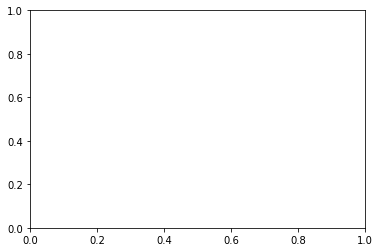

In [23]:
ae.test(X)

In [ ]:
imgs = ae.animate()

In [ ]:
for img in imgs:
    display(img)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(X[0])
plt.axis('off')

In [ ]:
z1 = ae.encode(X[0:1])

In [ ]:
z1.shape

In [ ]:
x1_const = ae.decode(z1)

In [ ]:
plt.imshow(x1_const[0])
plt.axis('off')

In [ ]:
pred = ae.reconst_loss(X[0:100])

In [ ]:
pred.shape

In [ ]:
plt.imshow(X[1])
plt.axis('off')

In [ ]:
imgs = ae.interpolate(X[0:100], X[200:300])

In [ ]:
from _utils.plots import merge
from scipy.misc import imresize

In [ ]:
len(imgs)

In [ ]:
scale = 20
im = merge(np.vstack(imgs), (len(imgs),12))
fig_width = int(im.shape[0] * scale)
fig_height = int(im.shape[1] * scale)

im = imresize(im, (fig_width, fig_height, 3))

In [ ]:
plt.figure(figsize = (len(imgs),24), dpi=70)
plt.imshow(im)
plt.axis('off')


In [ ]:
import scipy.misc
scipy.misc.imsave(ae.model.summary_dir+'\\interpolate.jpg', im)